In [1]:
import tweepy
import pandas as pd
import numpy as np
import configparser
import matplotlib.pyplot as plt

### 1. Configuration and Authentication 
---
We start by creating a 'config.ini' and storing the access keys and bearer token in it, then we authinticate tweepy access by obtaining bearer token from 'config.ini' file 

In [2]:
# Read the file from 'config.ini' 
config = configparser.ConfigParser(interpolation=None)
config.read('config.ini')

# Get bearer token
BEARER_TOKEN = config['twitter']['BEARER_TOKEN']

# Tweepy Auathintication
client = tweepy.Client(BEARER_TOKEN)


### 2. Data Collection
---
Next, we extract tweets by using Twitter API v2 endpoint. since we have Elevated access we can only use the recent search endpoint that returns tweets from the last 7 days with a maximum of 100 tweets per request. In order to collect as many tweets as possible, we used a paginator method that returns more results than can be returned in a single response. In our case, we set the to limit to 3000.

Afterwards, we fetched the tweets using the specified query, stored them in a dataframe, and finally saved them to a.csv file.

In [3]:
tweets = [] # main dataframe
data = [] 
columns_header = ['ID', 'Tweet', 'Timestamp', 'Likes', 'Retweets', 'Length']
qr = '(#hungerstation OR هانقرستيشن OR #هانقرستيشن OR @hungerstation) -is:retweet'

for tweet in tweepy.Paginator(client.search_recent_tweets, query=qr, tweet_fields=['created_at', 'public_metrics'], max_results=100).flatten(limit=3000):
    data.append([tweet.id, tweet.text , tweet.created_at, tweet.public_metrics['like_count'], tweet.public_metrics['retweet_count'], len(tweet.text)])


    
# Export the tweets to .csv file        
tweets = pd.DataFrame(data=data, columns=columns_header)
tweets.to_csv('tweets.csv')

### 3. Preliminary Data Exploration

In [4]:
display(tweets.head())
display(tweets.tail())
print('total of collected tweets is ', len(tweets))

,ID,Tweet,Timestamp,Likes,Retweets,Length
0,1578344112624762881,@HungerStation في الثانية 0:32 \nحلو الإعلان ع...,2022-10-07 11:18:55+00:00,0,0,68
1,1578343877345513474,@HungerStation البطل اللي أنقذ منتخبنا من المو...,2022-10-07 11:17:59+00:00,0,0,177
2,1578343487476756480,@HungerStation رد خاص,2022-10-07 11:16:26+00:00,0,0,21
3,1578343460201021443,@HungerStation البطل اللي أنقذ منتخبنا من المو...,2022-10-07 11:16:19+00:00,0,0,178
4,1578343381276585985,@HungerStation في الثانية 0:32,2022-10-07 11:16:00+00:00,0,0,30


,ID,Tweet,Timestamp,Likes,Retweets,Length
2995,1578021354565033987,@HungerStation في الدقيقة ٣٢ وهنقرستيشن فازع ل...,2022-10-06 13:56:23+00:00,0,0,82
2996,1578021313934807041,@HungerStation في الثانية 0:32 \nحلو الإعلان ع...,2022-10-06 13:56:14+00:00,0,0,55
2997,1578021313318641664,@HungerStation في الثانيه ٣٢ بالدقيقه الاولى ❤...,2022-10-06 13:56:13+00:00,0,0,56
2998,1578021280413990912,@HungerStation الدقيقه الاوى \n.\n\n.\n\n.,2022-10-06 13:56:06+00:00,0,0,38
2999,1578021270091747334,@HungerStation @chefduha @hunger_care @HungerS...,2022-10-06 13:56:03+00:00,0,0,156


total of collected tweets is  3000


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   ID         3000 non-null   int64              
 1   Tweet      3000 non-null   object             
 2   Timestamp  3000 non-null   datetime64[ns, UTC]
 3   Likes      3000 non-null   int64              
 4   Retweets   3000 non-null   int64              
 5   Length     3000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 140.8+ KB


### 4. Data Visualization

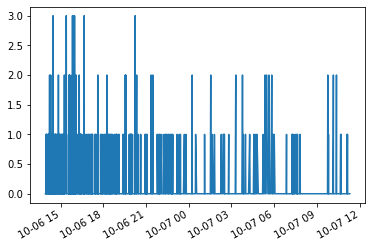

In [6]:
plt.plot(tweets['Timestamp'], tweets['Likes'])
plt.gcf().autofmt_xdate()
plt.show()

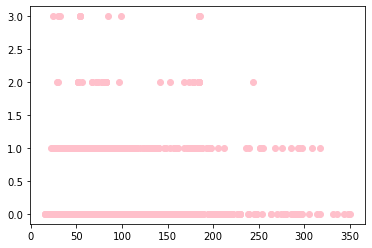

In [7]:
plt.scatter(tweets['Length'], tweets['Likes'], color='pink')
plt.show()

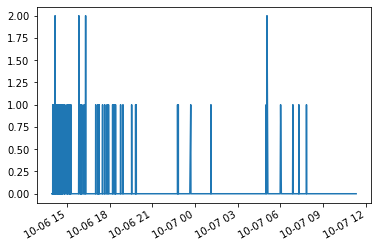

In [8]:
plt.plot(tweets['Timestamp'], tweets['Retweets'])
plt.gcf().autofmt_xdate()
plt.show()